In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
data = np.array([2,3,3,4,4,4,4,5,5,6])

In [7]:
# 평균
mu_1 = np.sum(data) / len(data)
mu_2 = np.mean(data)
mu_1, mu_2

(4.0, 4.0)

In [9]:
# 분산
var_1 = np.sum((data - mu_1)**2) / len(data)
var_2 = np.var(data)
var_1, var_2

(1.2, 1.2)

In [11]:
# 표본의 분산(불편분산)
var_3 = np.var(data, ddof=1)
var_3

1.3333333333333333

In [17]:
# 표준편차
std_1 = np.sqrt(var_1)
std_2 = np.std(data)
std_1, std_2

(1.0954451150103321, 1.0954451150103321)

In [18]:
# 불편분산의 표준편차
std_3 = np.sqrt(var_3)
std_4 = np.std(data, ddof=1)
std_3, std_4

(1.1547005383792515, 1.1547005383792515)

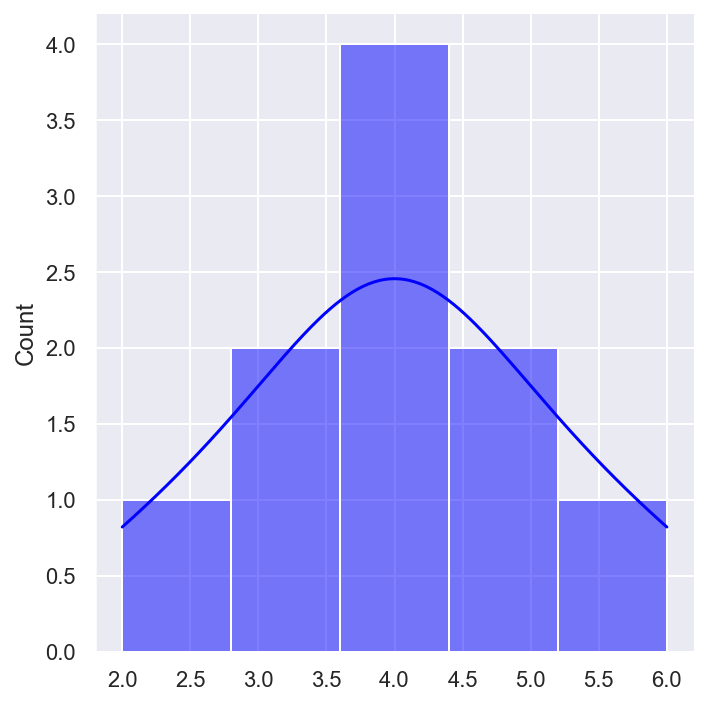

In [19]:
sns.displot(data, bins=5, color="blue", kde=True);

---

In [21]:
import pandas as pd

In [23]:
fish_multi = pd.read_csv("../data/3-3-2-fish_multi_2.csv")
fish_multi.tail()

,species,length
15,B,7
16,B,7
17,B,8
18,B,8
19,B,9


In [24]:
fish_multi.groupby("species").describe()

length                                          
         count mean       std  min   25%  50%   75%  max
species                                                 
A         10.0  4.0  1.154701  2.0  3.25  4.0  4.75  6.0
B         10.0  7.0  1.154701  5.0  6.25  7.0  7.75  9.0

In [27]:
len_a = fish_multi.query("species == 'A'")["length"]
len_b = fish_multi.query("species == 'B'")["length"]

C:\Users\jmkim\miniconda3\envs\ds_study\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\jmkim\miniconda3\envs\ds_study\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


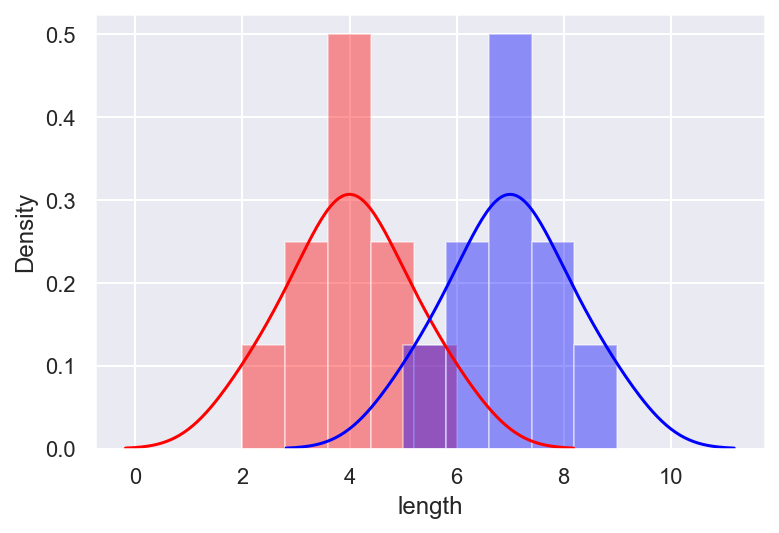

In [34]:
sns.distplot(len_a, bins=5, color="red", kde=True);
sns.distplot(len_b, bins=5, color="blue", kde=True);

<AxesSubplot:xlabel='species', ylabel='length'>

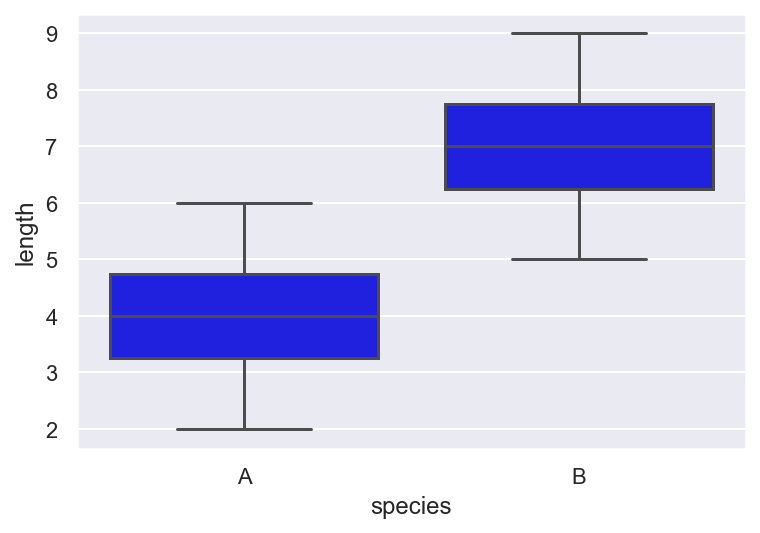

In [35]:
sns.boxplot(x = "species", y = "length", data = fish_multi, color="blue")

<AxesSubplot:xlabel='species', ylabel='length'>

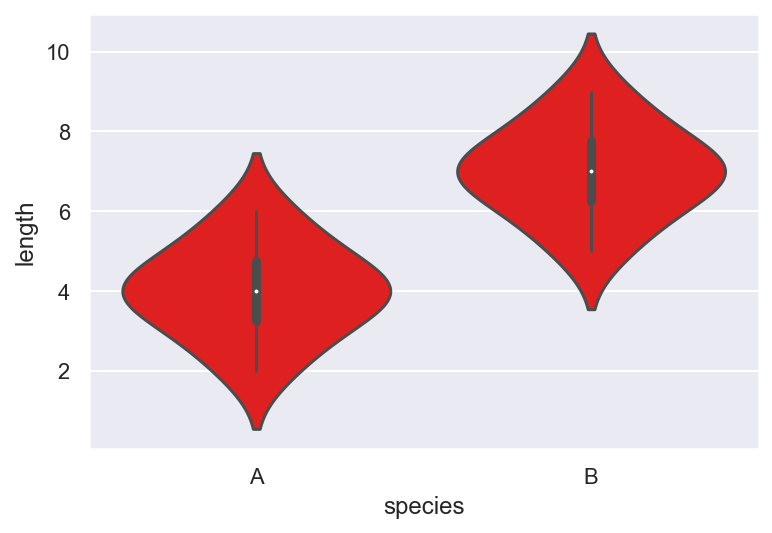

In [36]:
sns.violinplot(x = "species", y = "length", data = fish_multi, color = "red")

In [37]:
cov_data = pd.read_csv("../data/3-2-3-cov.csv")

In [38]:
cov_data.tail()

,x,y
5,21.7,41
6,21.8,52
7,22.0,44
8,23.4,44
9,23.8,49


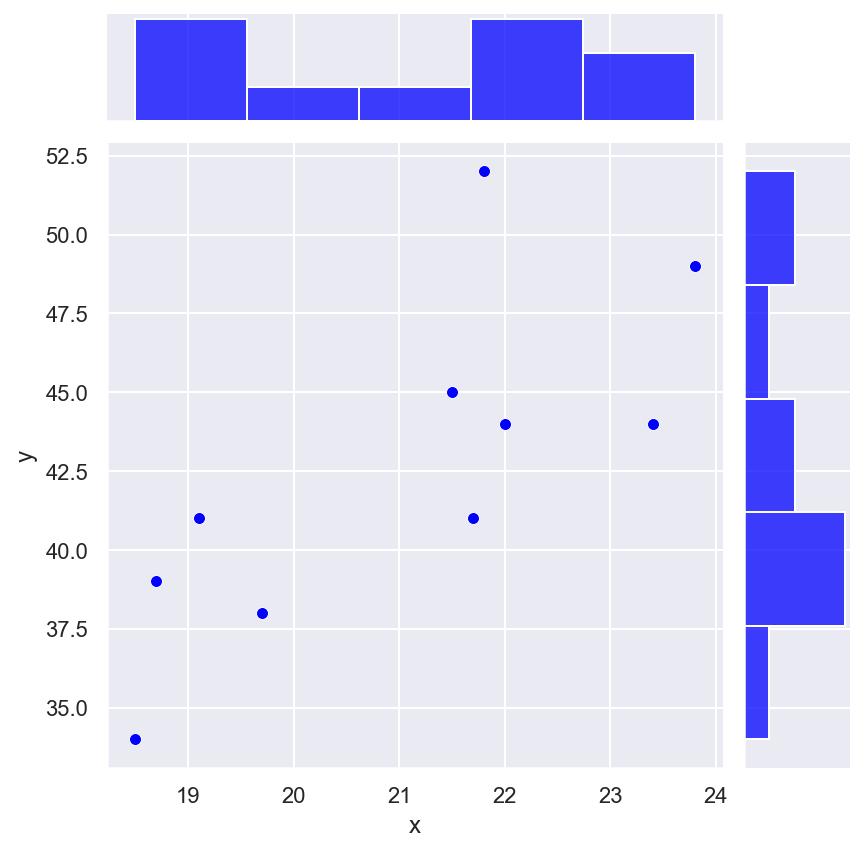

In [40]:
sns.jointplot(x="x", y="y", data=cov_data, color="blue");

---

In [41]:
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns

from scipy import stats
from matplotlib import pyplot as plt

%matplotlib inline

In [42]:
fish_5  = np.array([2,3,4,5,6])

In [64]:
# 비복원 추출
np.random.choice(fish_5, size=1, replace=False)

array([6])

In [65]:
np.random.choice(fish_5, size=3, replace=False)

array([3, 2, 6])

In [67]:
np.random.seed(13)
data = np.random.choice(fish_5, size=3, replace=False)
data

array([3, 5, 6])

In [68]:
np.mean(data)

4.666666666666667

In [71]:
fish_1000000 = pd.read_csv("../data/3-4-1-fish_length_100000.csv")["length"]
fish_1000000

0        5.297442
1        3.505566
2        3.572546
3        3.135979
4        4.689275
           ...   
99995    4.158780
99996    4.818718
99997    4.060880
99998    4.271488
99999    3.396745
Name: length, Length: 100000, dtype: float64

In [72]:
sampling_res = np.random.choice(fish_1000000, size=10, replace=False)

In [73]:
sampling_res

array([4.75108188, 4.37498586, 3.78013026, 2.96949093, 2.68097807,
       5.00637838, 4.31302466, 3.46929683, 5.16443516, 3.2858849 ])

In [74]:
np.mean(sampling_res)

3.9795686948818956

In [75]:
np.mean(fish_1000000)

4.000000000000023

C:\Users\jmkim\miniconda3\envs\ds_study\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='length', ylabel='Density'>

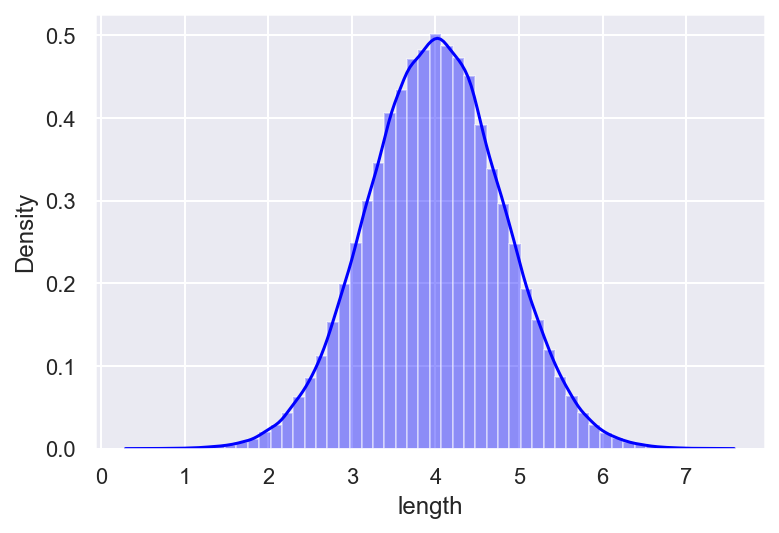

In [76]:
sns.distplot(fish_1000000, kde=True, color="blue")

In [78]:
# 모집단의 평균
np.mean(fish_1000000)

4.000000000000023

In [80]:
# 모집단의 분포
np.std(fish_1000000, ddof=0)

0.8000000000000054

In [81]:
# 1부터 7까지 0.1간격의 데이터 추출
x = np.arange(1, 7.1, 0.1)
x

array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2,
       2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5,
       3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8,
       4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1,
       6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7. ])

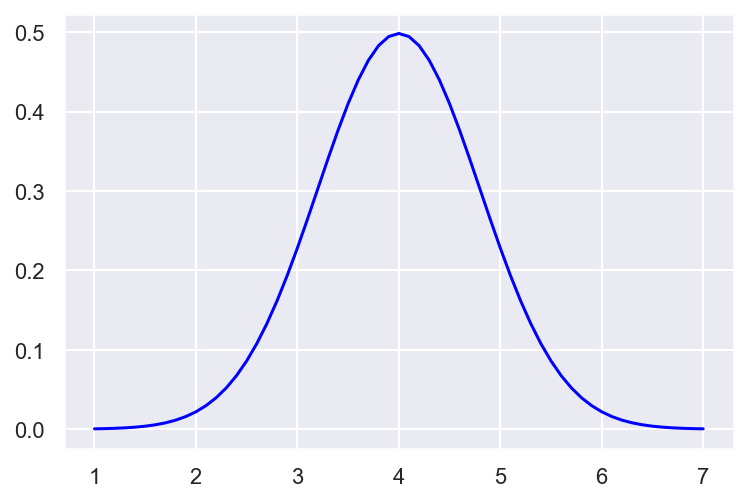

In [83]:
# 정규분포(평균이 4이고, 표준편차이 0.8인 정규분포)
# 참고 : https://m.blog.naver.com/pmw9440/221805677577
stats.norm.pdf(x=x, loc=4, scale=0.8)
plt.plot(x, stats.norm.pdf(x=x, loc=4, scale=0.8), color="blue")

C:\Users\jmkim\miniconda3\envs\ds_study\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


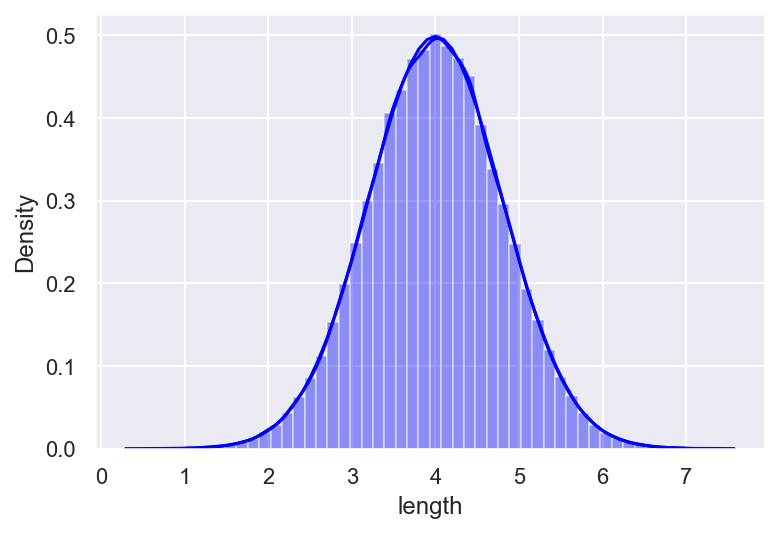

In [85]:
sns.distplot(fish_1000000, kde=True, color="blue", norm_hist=True);
plt.plot(x, stats.norm.pdf(x=x, loc=4, scale=0.8), color="blue");

---

## 표본 통계

In [86]:
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns

from scipy import stats
from matplotlib import pyplot as plt

%matplotlib inline

In [92]:
# 평균이 4이고, 표준편차가 0.8인 정규분포를 따르는 모집단 선언
population = stats.norm(loc=4, scale=0.8)

In [93]:
population

In [95]:
# 평균이 4이고, 표준편차가 0.8인 정규분포를 따르는 모집단에서 10개의 데이터를 추출
population.rvs(size=10)

array([3.99906622, 4.39300069, 3.11667363, 4.29677785, 4.88413131,
       3.69075981, 3.37903351, 2.86715318, 4.20007657, 3.47831059])

In [97]:
sample_mean_array = np.zeros(10000)
sample_mean_array, len(sample_mean_array)

(array([0., 0., 0., ..., 0., 0., 0.]), 10000)

In [110]:
np.random.seed(13)
for i in range(0, len(sample_mean_array)):
    sample = population.rvs(size = 10)
    sample_mean_array[i] = np.mean(sample)

In [111]:
sample_mean_array

array([4.3976666 , 4.18857764, 3.8425394 , ..., 4.12495865, 4.12127892,
       4.05054023])

In [112]:
np.mean(sample_mean_array)

4.003651723722899

In [113]:
np.std(sample_mean_array, ddof=0)

0.25328735533634056

In [114]:
np.std(sample_mean_array, ddof=1)

0.25330002065401414

C:\Users\jmkim\miniconda3\envs\ds_study\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


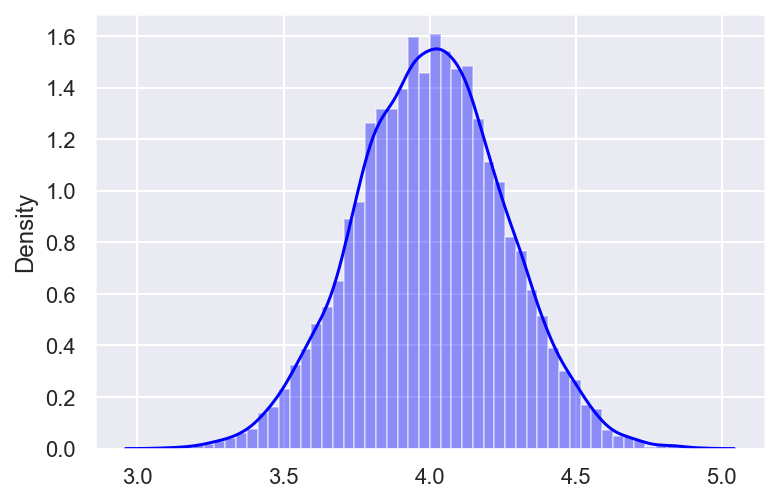

In [116]:
sns.distplot(sample_mean_array, color="blue");

In [121]:
# 샘플사이즈를 다양하게 다시 시도해보자
size_array = np.arange(10, 100100, 100)
len(size_array), size_array

(1001, array([    10,    110,    210, ...,  99810,  99910, 100010]))

In [119]:
sample_mean_array_size = np.zeros(len(size_array))

In [122]:
len(sample_mean_array_size), sample_mean_array_size

(1001, array([0., 0., 0., ..., 0., 0., 0.]))

In [123]:
for i in range(0, len(size_array)):
    sample = population.rvs(size=size_array[i])
    sample_mean_array_size[i] = np.mean(sample)

In [125]:
np.mean(sample_mean_array_size)

3.999826451861841

In [126]:
np.std(sample_mean_array_size, ddof=0)

0.006909956348038221

In [127]:
np.std(sample_mean_array_size, ddof=1)

0.006913410462899299

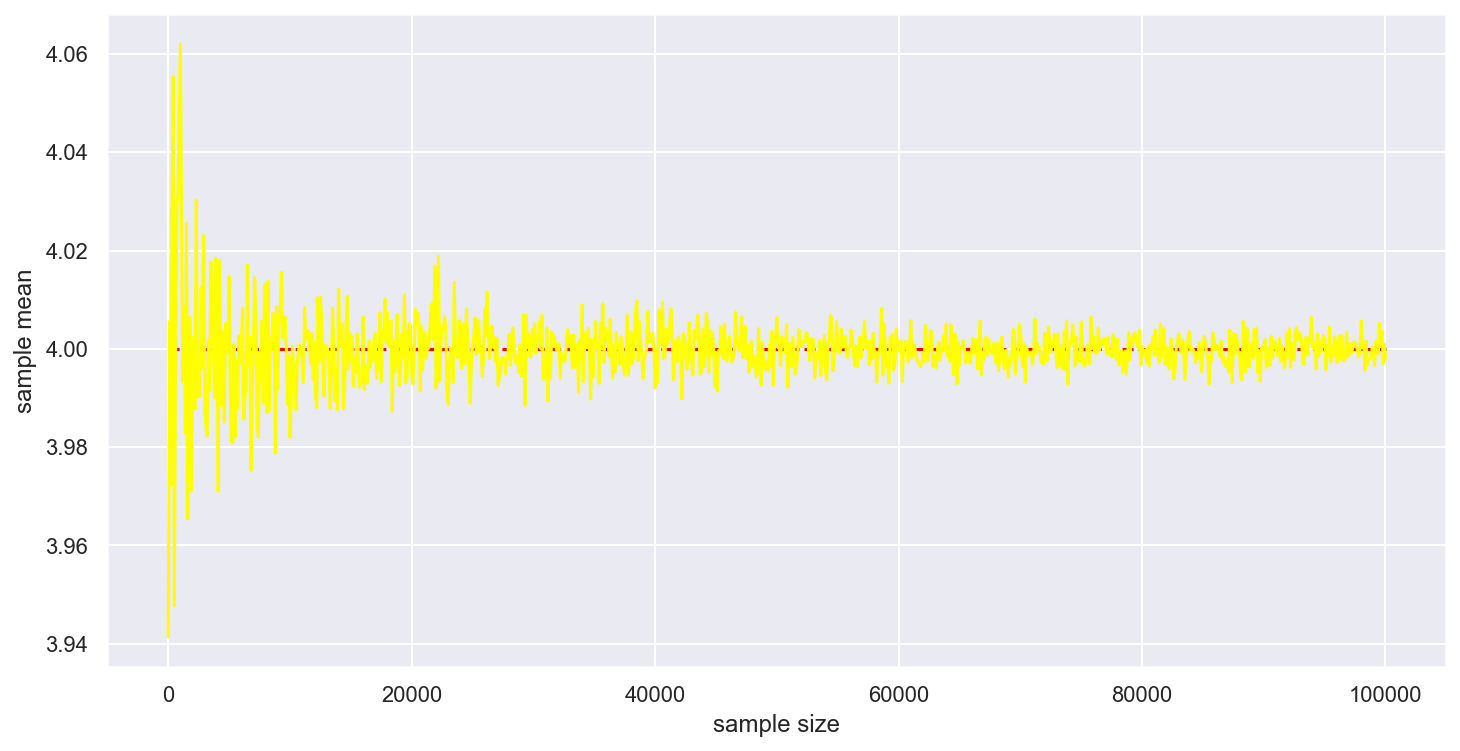

In [134]:
plt.figure(figsize=(12, 6))
plt.plot(size_array, sample_mean_array_size, color="yellow")
plt.hlines(4, 0, max(size_array), color="red", linestyles="dashed")
plt.xlabel('sample size')
plt.ylabel('sample mean')
plt.show()

### 평균을 계산하는 함수

In [136]:
def calc_sample_mean(size, n_trail):
    
    sample_mean_array = np.zeros(n_trail)
    
    for i in range(0,n_trail):
        sample = population.rvs(size)
        sample_mean_array[i] = np.mean(sample)
        
    return sample_mean_array